In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [206]:
data_pth = "Chicago_Public_Schools_Progress_Reports_2023.csv"
df = pd.read_csv(data_pth)


### Selecting features that are relevant in our case

In [207]:
features_of_interest = ["Short_Name", "School_Type", "Primary_Category", "Progress_Report_Year",
                        "Creative_School_Certification", "School_Survey_Supportive_Environment",
                        "School_Survey_Safety", "Suspensions_Per_100_Students_Year_2_Pct", "Misconducts_To_Suspensions_Year_2_Pct",
                        "Student_Attendance_Year_2_Pct", "Teacher_Attendance_Year_2_Pct"]

In [208]:
new_df = df.loc[:,features_of_interest].copy(deep=True)
new_df.head(10)

,Short_Name,School_Type,Primary_Category,Progress_Report_Year,Creative_School_Certification,School_Survey_Supportive_Environment,School_Survey_Safety,Suspensions_Per_100_Students_Year_2_Pct,Misconducts_To_Suspensions_Year_2_Pct,Student_Attendance_Year_2_Pct,Teacher_Attendance_Year_2_Pct
0,RUIZ,Neighborhood,ES,2022,STRONG,NEUTRAL,NEUTRAL,1.3,9.1,88.6,91.2
1,ROOSEVELT HS,Neighborhood,HS,2022,EXCELLING,NEUTRAL,WEAK,4.7,6.9,79.2,92.3
2,LLOYD,Neighborhood,ES,2022,DEVELOPING,NEUTRAL,WEAK,NaN,NaN,89.2,93.7
3,HEDGES,Neighborhood,ES,2022,EXCELLING,NEUTRAL,WEAK,0.6,5.9,88.3,92.5
4,SKINNER NORTH,Classical,ES,2022,EXCELLING,NOT ENOUGH DATA,NOT ENOUGH DATA,0.4,3.2,94.6,92.7
5,KELLOGG,Neighborhood,ES,2022,STRONG,WEAK,NEUTRAL,0.4,20.0,94.2,92.8
6,SHERIDAN,Magnet,ES,2022,EXCELLING,NEUTRAL,WEAK,NaN,NaN,94.6,94.2
7,MITCHELL,Neighborhood,ES,2022,STRONG,NEUTRAL,NEUTRAL,0.3,25.0,92.1,92.2
8,CARROLL,Neighborhood,ES,2022,INCOMPLETE DATA,STRONG,STRONG,12.8,27.8,89.8,92.2
9,ACERO - IDAR,Charter,ES,2022,EXCELLING,NEUTRAL,NEUTRAL,NaN,NaN,93.0,NaN


Now we look at how supportive schools are at various levels (elementary/middle/high) by comparing the proportion of the schools ranked supportive with various levels - VERY WEAK, WEAK, NEUTRAL, STRONG, VERY STRONG

## Graph 1 - Supportive Environments at Various School Levels

c:\Users\rajme\anaconda3\envs\cs418-ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


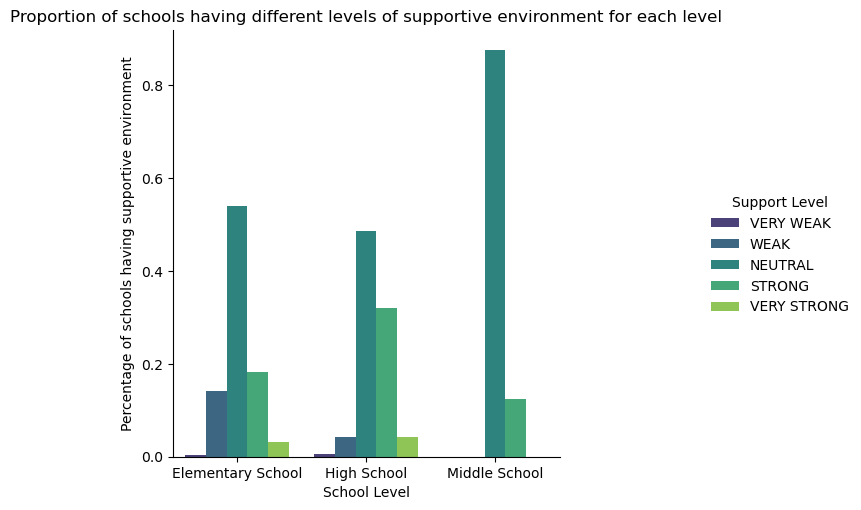

In [210]:
school_level_df = new_df[["Primary_Category","School_Survey_Supportive_Environment"]].groupby(by="Primary_Category")["School_Survey_Supportive_Environment"].value_counts(normalize=True).reset_index()
school_level_df = school_level_df[school_level_df["School_Survey_Supportive_Environment"] != "NOT ENOUGH DATA"]

hue_order = ['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG']

graph = sns.catplot(data=school_level_df, x="Primary_Category", y="proportion", hue="School_Survey_Supportive_Environment", hue_order=hue_order, kind='bar', palette='viridis')
graph.set_axis_labels("School Level", "Percentage of schools having supportive environment")
graph.legend.set_title("Support Level")
plt.title("Proportion of schools having different levels of supportive environment for each level", loc="center")
plt.xticks(ticks=[0,1,2],labels=["Elementary School", "High School", "Middle School"])

plt.show()

Next, we look at how a school's perceived safety affects attendance levels of students and teachers. We expect the attendance to increase as school's perceived safety increases.

## Graph 2 - Student-Teacher Attendance v/s School Safety

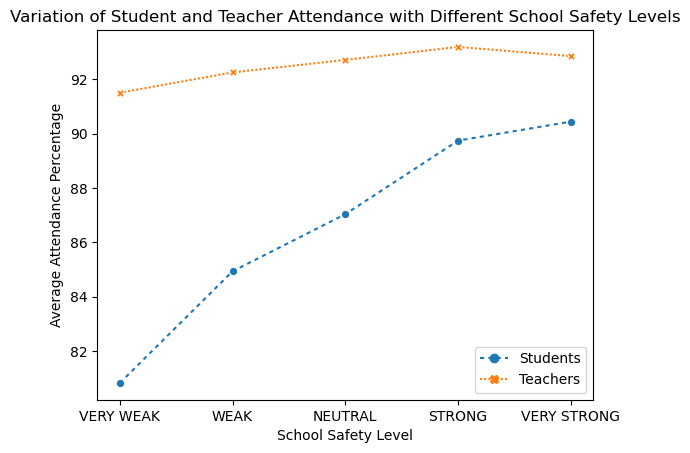

In [211]:
attendance_df = new_df[["School_Survey_Safety", "Student_Attendance_Year_2_Pct", "Teacher_Attendance_Year_2_Pct"]].groupby(by="School_Survey_Safety").mean()
attendance_df = attendance_df.reset_index().sort_values(by="Student_Attendance_Year_2_Pct")
attendance_df = attendance_df[attendance_df["School_Survey_Safety"] != "NOT ENOUGH DATA"]

attendance_df_melted = pd.melt(attendance_df, id_vars=['School_Survey_Safety'], var_name='Variable', value_name='Value')

graph = sns.lineplot(data=attendance_df_melted, x="School_Survey_Safety", y='Value', hue='Variable', style='Variable', markers=True, dashes={'Student_Attendance_Year_2_Pct': (2, 2), 'Teacher_Attendance_Year_2_Pct': (1, 1)})

legend = plt.legend()

legend.get_texts()[0].set_text('Students')
legend.get_texts()[1].set_text('Teachers')

legend.get_title().set_text("")
plt.xlabel("School Safety Level")
plt.ylabel("Average Attendance Percentage")
plt.title("Variation of Student and Teacher Attendance with Different School Safety Levels")

plt.show()

Now we look at how the type of location of the school is correlated with how safe it is.

## Graph 3 - School Type v/s School Safety

c:\Users\rajme\anaconda3\envs\cs418-ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


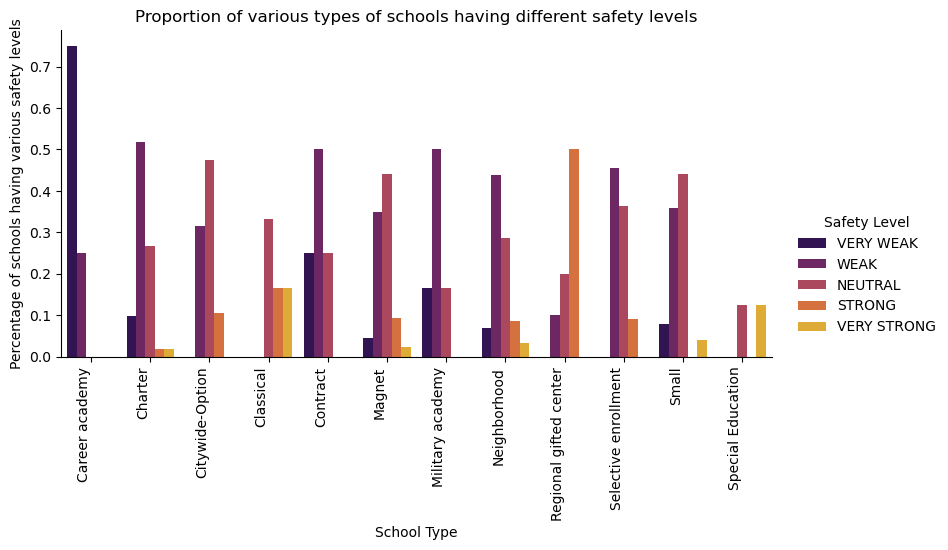

In [212]:
neighborhood_df = new_df[["School_Type","School_Survey_Safety"]].groupby(by="School_Type")["School_Survey_Safety"].value_counts(normalize=True).reset_index()
neighborhood_df = neighborhood_df[neighborhood_df["School_Survey_Safety"] != "NOT ENOUGH DATA"]

hue_order = ['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG']

graph = sns.catplot(data=neighborhood_df, x="School_Type", y="proportion", hue="School_Survey_Safety", hue_order=hue_order, kind='bar', palette='inferno', height=4, aspect=2)
graph.set_axis_labels("School Type", "Percentage of schools having various safety levels")
graph.legend.set_title("Safety Level")
graph.set_xticklabels(rotation=90, ha='right')
plt.title("Proportion of various types of schools having different safety levels", loc="center")


plt.show()

## Reflections

1. <u> Most Challenging Part:</u> This dataset has a lot of missing datapoints, making the analysis difficult.
2. <u> Insights:</u> My initial data analysis shows that a school's safety and how supportive its environment is affects the students in the community significantly - it affects their attendance, how disciplined and motivated they are, and how much they can focus on their studies. This in turn will lead to more people in their community in the future who are not skilled enough or are not motivated enough to work and make most of the opportunities that can lead to an increase in crime in the area.
3. <u> Concrete Results:</u> The above analysis shows that student attendance decreases with a decrease in school safety and there is a clear parity between safety levels of schools in various location settings.
4. <u> Biggest Problem:</u> Integrating the results and the data I have with other datasets to reach a strong conclusion about factors leading to crime in Chicago.
5. <u> On-Track:</u> I think we are on track with the project and we should be able to resolve the issues that we have highlighted.
6. <u> Is it worth it?:</u> I believe we have good data analysis and good results so it is definitely worth it moving ahead with this project as it will be able to give us valuable insights into the crime landscape of Chicago.
